### Imports

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
from statistics import stdev  
from math import sqrt  
import scipy
from scipy.stats import t
from collections import namedtuple
import cycler
from statistics import stdev  
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import norm
from math import sqrt  
import scipy
%matplotlib inline

### Estilo dos Gráficos

In [364]:
__version__ = '2022.10.04.dev1'

NordColors = namedtuple('NordColors', ['red', 'orange', 'yellow',
    'green', 'greenish', 'lightblue', 'blue', 'darkblue', 'purple'])
colors = NordColors(red='#bf616a', orange='#FAA88F', yellow='#ebcb8b',
    green='#8B887B', greenish='#8fbcbb', lightblue='#8B887B',
    blue='#81a1c1', darkblue='#5e81ac', purple='#b48ead')

def install():
    ''' Sets properties common to all variants.
    '''
    # colors used for lines on plots
    color_cycle = [colors.orange, colors.greenish, colors.lightblue, colors.purple, colors.greenish, 
                    colors.yellow, colors.red, colors.blue,
                   colors.green, colors.darkblue, colors.purple]
    plt.rcParams['axes.prop_cycle'] = cycler.cycler('color', color_cycle)

    # interactively save figures in the current (not home) directory
    plt.rcParams['savefig.directory'] = ''

    # a simple default figure size
    plt.rcParams['figure.figsize'] = (8, 6)

    # spine ticks go inward (more consistent with journal standards)
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    # add a little padding around the ticks
    plt.rcParams['xtick.major.pad'] = 10
    plt.rcParams['ytick.major.pad'] = 10
        # background elements get white color explicitly
    plt.rcParams['figure.facecolor'] = '#EAEADF'
    plt.rcParams['figure.facecolor'] = '#EAEADF'
    plt.rcParams['axes.facecolor']   = '#EAEADF'

    # foreground elements get black color explicitly
    plt.rcParams['axes.edgecolor']   = '#000000'
    plt.rcParams['text.color']       = '#000000'
    plt.rcParams['axes.labelcolor']  = '#000000'
    plt.rcParams['xtick.color']      = '#000000'
    plt.rcParams['ytick.color']      = '#000000'

    # larger fonts for better readability
    plt.rcParams['figure.titlesize'] = 24
    plt.rcParams['xtick.labelsize']  = 15
    plt.rcParams['ytick.labelsize']  = 15
    plt.rcParams['axes.labelsize']   = 16
    plt.rcParams['axes.titlesize']   = 16
    plt.rcParams['legend.fontsize']  = 13

    # serif fonts everywhere (text and math)
    
    plt.rcParams['font.family']      = 'serif'

# globals that may be useful for the user when adding other elements
bgcolor = '#ffffff'
fgcolor = '#000000'
install()

## CÓDIGO

##### Data Cleanning

In [94]:
raw_df = pd.read_csv('Superstore.csv', encoding='latin1',sep=',')

In [95]:
raw_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [96]:
raw_df.shape

(9994, 21)

In [97]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [98]:
raw_df.iloc[:, 17:20].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,229.858001,623.245101,0.444,17.28,54.49,209.94,22638.48
Quantity,9994.0,3.789574,2.225110,1.000,2.00,3.00,5.00,14.00
Discount,9994.0,0.156203,0.206452,0.000,0.00,0.20,0.20,0.80


In [99]:
raw_df.drop(columns={'Order ID','Ship Date','Customer ID','Country','Product ID','Product Name','Ship Mode','Postal Code','Customer Name'}, inplace=True)
raw_df.set_index('Row ID', inplace=True)

In [100]:
raw_df.columns

Index(['Order Date', 'Segment', 'City', 'State', 'Region', 'Category',
       'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [101]:
raw_df['Order Date'] = pd.to_datetime(raw_df['Order Date'], format='mixed')

In [102]:
raw_df['Ano'] = pd.DatetimeIndex(raw_df['Order Date']).year
raw_df['Mes'] = pd.DatetimeIndex(raw_df['Order Date']).month
raw_df['Ano'] = pd.to_datetime(raw_df['Ano'], format='%Y')
raw_df['Mes'] = pd.to_datetime(raw_df['Ano'], format='%Y-%m')

In [103]:
raw_df['Sales'] = round(raw_df['Sales'],2)
raw_df['Profit'] = round(raw_df['Profit'],2)


In [104]:
raw_df

,Order Date,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ano,Mes
Row ID,,,,,,,,,,,,,
1,2013-09-11,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.96,2,0.00,41.91,2013-01-01,2013-01-01
2,2013-09-11,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.94,3,0.00,219.58,2013-01-01,2013-01-01
3,2013-06-13,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.62,2,0.00,6.87,2013-01-01,2013-01-01
4,2012-11-10,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.58,5,0.45,-383.03,2012-01-01,2012-01-01
5,2012-11-10,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.37,2,0.20,2.52,2012-01-01,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,2011-01-22,Consumer,Miami,Florida,South,Furniture,Furnishings,25.25,3,0.20,4.10,2011-01-01,2011-01-01
9991,2014-02-27,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.96,2,0.00,15.63,2014-01-01,2014-01-01
9992,2014-02-27,Consumer,Costa Mesa,California,West,Technology,Phones,258.58,2,0.20,19.39,2014-01-01,2014-01-01


##### Grupo Gráfico 1

In [105]:
a = raw_df.groupby(by='Ano',as_index=False).sum(numeric_only=True)
b = raw_df.groupby(by=['Ano','Segment'], as_index=False)['Profit'].sum()
a.set_index('Ano', inplace=True)

In [106]:
b['Var Sales By Segment_L1Y'] = round(b['Profit'].pct_change(3)*100,2)
b['Var Sales By Segment_L2Y'] = round(b['Profit'].pct_change(6)*100,2)
b.fillna(0, inplace=True)

In [107]:
a

,Sales,Quantity,Discount,Profit
Ano,,,,
2011-01-01,484247.47,7581,315.46,49543.86
2012-01-01,470532.39,7979,327.09,61618.44
2013-01-01,608473.96,9810,399.12,81726.66
2014-01-01,733946.83,12503,519.42,93507.58


In [108]:
b

,Ano,Segment,Profit,Var Sales By Segment_L1Y,Var Sales By Segment_L2Y
0,2011-01-01,Consumer,24319.69,0.00,0.00
1,2011-01-01,Corporate,13513.31,0.00,0.00
2,2011-01-01,Home Office,11710.86,0.00,0.00
3,2012-01-01,Consumer,28460.05,17.02,0.00
4,2012-01-01,Corporate,20688.33,53.10,0.00
5,2012-01-01,Home Office,12470.06,6.48,0.00
6,2013-01-01,Consumer,35758.07,25.64,47.03
7,2013-01-01,Corporate,30939.47,49.55,128.96
8,2013-01-01,Home Office,15029.12,20.52,28.33
9,2014-01-01,Consumer,45580.83,27.47,60.16


,0,1,2,3,4,5,6,7,8,9,10,11
Ano,2011-01-01 00:00:00,2011-01-01 00:00:00,2011-01-01 00:00:00,2012-01-01 00:00:00,2012-01-01 00:00:00,2012-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2013-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00
Segment,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office,Consumer,Corporate,Home Office
Profit,24319.69,13513.31,11710.86,28460.05,20688.33,12470.06,35758.07,30939.47,15029.12,45580.83,26838.02,21088.73
Var Sales By Segment_L1Y,0.0,0.0,0.0,17.02,53.1,6.48,25.64,49.55,20.52,27.47,-13.26,40.32
Var Sales By Segment_L2Y,0.0,0.0,0.0,0.0,0.0,0.0,47.03,128.96,28.33,60.16,29.73,69.11


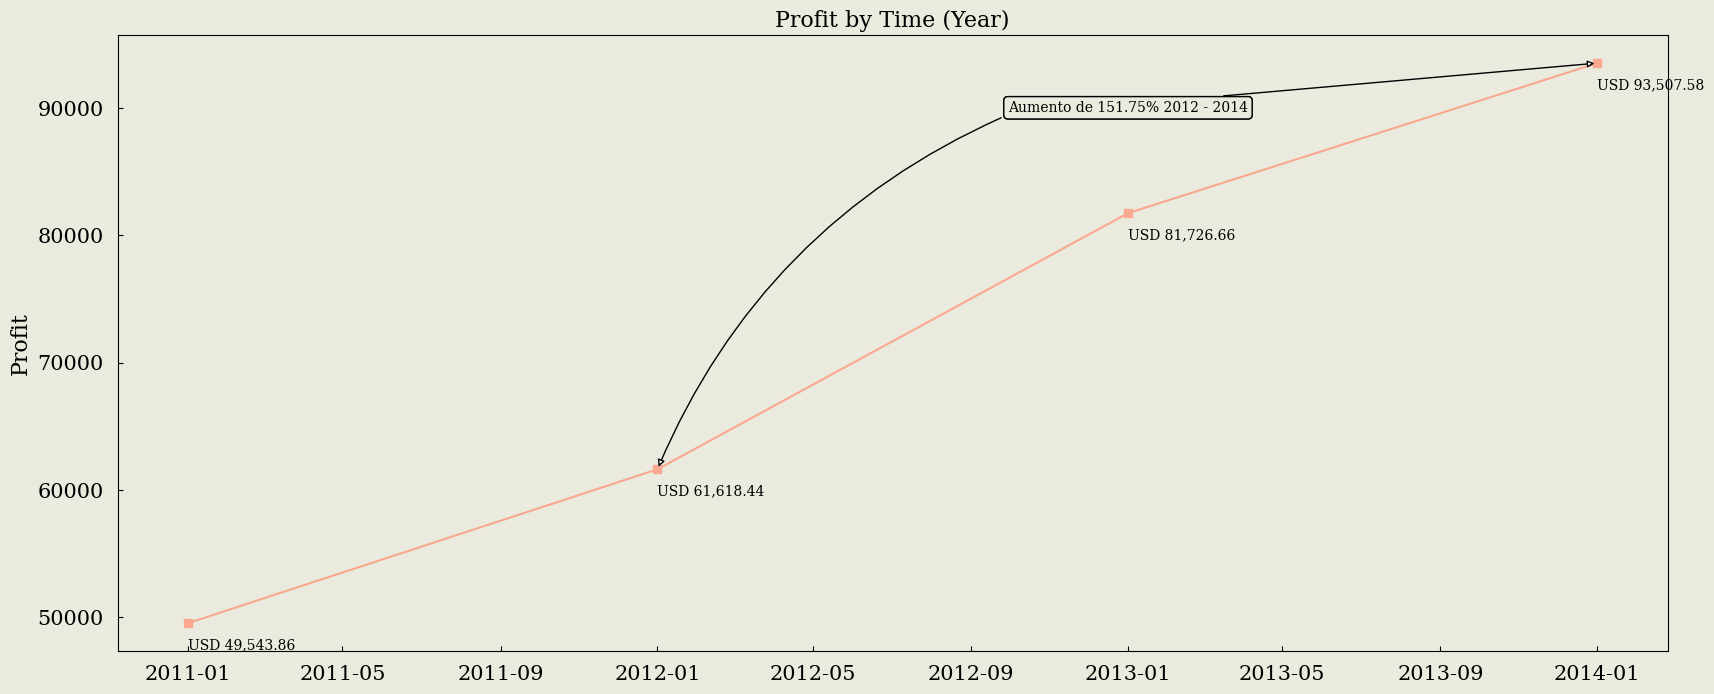

In [109]:

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(a['Profit'], marker='s')

ax.set_ylabel('Profit')
ax.set_title('Profit by Time (Year)')


for x, valor in enumerate(a['Profit'], start=0):
    ax.text(x = a.index[x],
    y=valor-2000,
    s = f'USD {valor:,.2f}',
    ha='left')


Profit_2014 = a.iloc[3]['Profit']
Profit_2012 = a.iloc[1]['Profit']
profit_raise = (Profit_2014/Profit_2012)


ano_2014 = pd.to_datetime('2014-01-01')
ano_2012 = pd.to_datetime('2012-01-01')
ano_2013 = pd.to_datetime('2013-01-01')
ano_2013_5 = pd.to_datetime('2013-05-01')

ax.annotate(f'Aumento de {profit_raise:,.2%} 2012 - 2014',
                  xy=(ano_2012, 61618), xycoords='data',
                  xytext=(ano_2013, 90000), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(boxstyle="round",facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.2",
                                  relpos=(0., 0.),
                                  fc="w"))
ax.annotate(f'Aumento de {profit_raise:,.2%} 2012 - 2014',
                  xy=(ano_2014, 93507), xycoords='data',
                  xytext=(ano_2013, 90000), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(boxstyle="round",facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.0",
                                  relpos=(0., 0.),
                                  fc="w"))
display(b.T)

##### Grupo Gráfico 2

In [110]:
raw_df_gap_2012_2014 = raw_df.loc[(raw_df['Ano'] == '2012-01-01') | (raw_df['Ano'] == '2014-01-01')]

In [111]:
raw_df_gap_2012_2014.tail()

,Order Date,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ano,Mes
Row ID,,,,,,,,,,,,,
9989,2014-11-18,Corporate,Athens,Georgia,South,Technology,Phones,206.10,5,0.0,55.65,2014-01-01,2014-01-01
9991,2014-02-27,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.96,2,0.0,15.63,2014-01-01,2014-01-01
9992,2014-02-27,Consumer,Costa Mesa,California,West,Technology,Phones,258.58,2,0.2,19.39,2014-01-01,2014-01-01
9993,2014-02-27,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.60,4,0.0,13.32,2014-01-01,2014-01-01
9994,2014-05-05,Consumer,Westminster,California,West,Office Supplies,Appliances,243.16,2,0.0,72.95,2014-01-01,2014-01-01


In [112]:
raw_df_gap_2012_2014.iloc[:, 7:11].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,5421.0,222.187644,542.260172,0.44,17.24,55.86,207.98,13999.96
Quantity,5421.0,3.778270,2.229436,1.00,2.00,3.00,5.00,14.00
Discount,5421.0,0.156154,0.207962,0.00,0.00,0.20,0.20,0.80
Profit,5421.0,28.615757,221.385895,-3839.99,1.72,8.69,30.19,6719.98


In [113]:
raw_df_gap_2012_2014=raw_df_gap_2012_2014.groupby(by=['Ano','Region'], as_index=False)['Profit'].sum()

In [114]:
raw_df_gap_2012_2014['Ano'] = pd.DatetimeIndex(raw_df_gap_2012_2014['Ano']).year

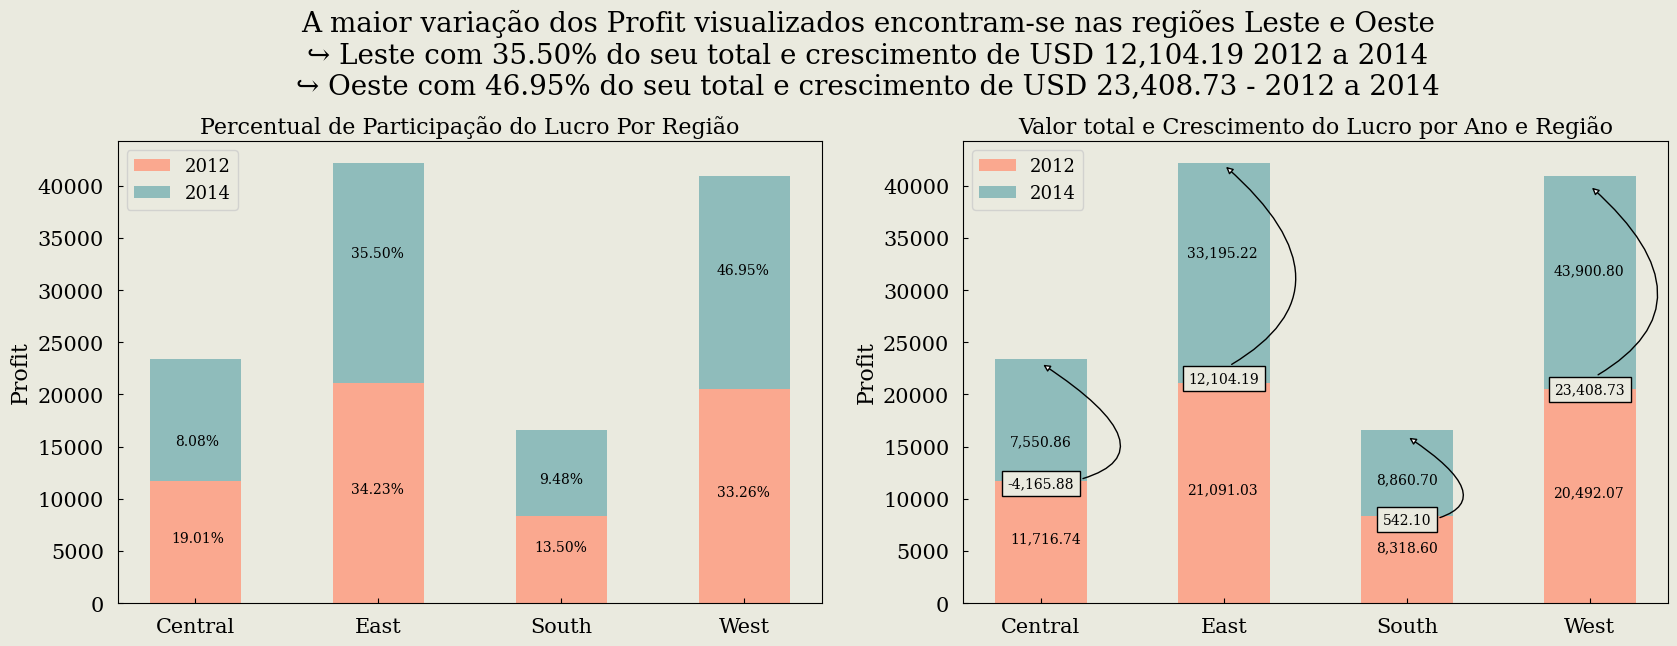

In [115]:
prof_region_2012 = raw_df_gap_2012_2014[raw_df_gap_2012_2014['Ano'] == 2012].groupby(by='Region')['Profit'].sum()
prof_region_2014 = raw_df_gap_2012_2014[raw_df_gap_2012_2014['Ano'] == 2014].groupby(by='Region')['Profit'].sum()
rot = raw_df_gap_2012_2014['Region'].unique()


central_2014_profit = prof_region_2014[0]/Profit_2014
east_2014_profit = prof_region_2014[1]/Profit_2014
south_2014_profit = prof_region_2014[2]/Profit_2014
west_2014_profit = prof_region_2014[3]/Profit_2014
central_2012_profit = prof_region_2012[0]/Profit_2012
east_2012_profit = prof_region_2012[1]/Profit_2012
south_2012_profit = prof_region_2012[2]/Profit_2012
west_2012_profit = prof_region_2012[3]/Profit_2012


dif_central = prof_region_2014[0]-prof_region_2012[0]
dif_east = prof_region_2014[1]-prof_region_2012[1]
dif_south = prof_region_2014[2]-prof_region_2012[2]
dif_west = prof_region_2014[3]-prof_region_2012[3]




fig,ax = plt.subplots(1,2,figsize=(20,6))

fig.suptitle(f'A maior variação dos Profit visualizados encontram-se nas regiões Leste e Oeste\n↪ Leste com {east_2014_profit:,.2%} do seu total e crescimento de USD {dif_east:,.2F} 2012 a 2014\n↪ Oeste com {west_2014_profit:,.2%} do seu total e crescimento de USD {dif_west:,.2F} - 2012 a 2014', y=1.1, fontsize=20)


ax[0].bar(rot, height=prof_region_2012, label='2012', width=0.5)

ax[0].bar(rot, height=prof_region_2012, label='2014', bottom=prof_region_2012, width=0.5)
#ax[0].spines['top'].set_visible(False)
#ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('Profit')
ax[0].set_title('Percentual de Participação do Lucro Por Região')

ax[0].text(x=-0.11, y=prof_region_2014[0]*2, s=f'{central_2014_profit:,.2%}')
ax[0].text(x=-0.13, y=prof_region_2012[0]/2, s=f'{central_2012_profit:,.2%}')
ax[0].text(x=0.85, y=prof_region_2014[1], s=f'{east_2014_profit:,.2%}')
ax[0].text(x=0.85, y=prof_region_2012[1]/2, s=f'{east_2012_profit:,.2%}')
ax[0].text(x=1.88, y=11500, s=f'{south_2014_profit:,.2%}')
ax[0].text(x=1.85, y=5000, s=f'{south_2012_profit:,.2%}')
ax[0].text(x=2.85, y=31500, s=f'{west_2014_profit:,.2%}')
ax[0].text(x=2.85, y=prof_region_2012[3]/2, s=f'{west_2012_profit:,.2%}')

ax[0].legend()



ax[1].bar(rot, height=prof_region_2012, label='2012', width=0.5)

ax[1].bar(rot, height=prof_region_2012, label='2014', bottom=prof_region_2012, width=0.5)
#ax[1].spines['top'].set_visible(False)
#ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('Profit')
ax[1].set_title('Valor total e Crescimento do Lucro por Ano e Região')


ax[1].text(x=-0.17, y=prof_region_2014[0]*2, s=f'{prof_region_2014[0]:,.2F}')
ax[1].text(x=-0.17, y=prof_region_2012[0]/2, s=f'{prof_region_2012[0]:,.2F}')
ax[1].text(x=0.80, y=prof_region_2014[1], s=f'{prof_region_2014[1]:,.2F}')
ax[1].text(x=0.80, y=prof_region_2012[1]/2, s=f'{prof_region_2012[1]:,.2F}')
ax[1].text(x=1.83, y=11500, s=f'{prof_region_2014[2]:,.2F}')
ax[1].text(x=1.83, y=5000, s=f'{prof_region_2012[2]:,.2F}')
ax[1].text(x=2.80, y=31500, s=f'{prof_region_2014[3]:,.2F}')
ax[1].text(x=2.80, y=prof_region_2012[3]/2, s=f'{prof_region_2012[3]:,.2F}')

ax[1].legend()


ax[1].annotate(f'{dif_central:,.2F}',
                  xy=('Central', 23000), xycoords='data',
                  xytext=(0, 11500), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=1.5",
                                  relpos=(0., 0.),
                                  fc="w"))

ax[1].annotate(f'{dif_east:,.2F}',
                  xy=('East', 42000), xycoords='data',
                  xytext=(1, 21500), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.8",
                                  relpos=(0., 0.),
                                  fc="w"))


ax[1].annotate(f'{dif_south:,.2F}',
                  xy=('South', 16000), xycoords='data',
                  xytext=(2, 8000), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=1.5",
                                  relpos=(0., 0.),
                                  fc="w"))


ax[1].annotate(f'{dif_west:,.2F}',
                  xy=('West', 40000), xycoords='data',
                  xytext=(3, 20500), textcoords='data',
                  va="center", ha="center",
                  bbox=dict(facecolor='#EAEADF',edgecolor='black'),
                  arrowprops=dict(arrowstyle="-|>",
                                  connectionstyle="arc3,rad=0.8",
                                  relpos=(0., 0.),
                                  fc="w"))





plt.show()

##### Grupo Gráfico 3

In [116]:
regio_raw = raw_df.loc[(raw_df['Region'] == 'East') | (raw_df['Region'] == 'West')]
regio_raw = regio_raw.loc[(regio_raw['Ano'] == '2014-01-01')]

In [117]:
lets_see = regio_raw.groupby(by='State',as_index=False)['Profit'].sum().sort_values(by='Profit',ascending=False)
lets_see = lets_see.iloc[0:18]
a = lets_see['Profit'].sum()
lets_see['perc_do_total'] = round(((lets_see['Profit']/a)*100),2)
lets_see['cum'] = lets_see['perc_do_total'].cumsum()

In [118]:
lets_see

,State,Profit,perc_do_total,cum
1,California,29402.65,32.64,32.64
14,New York,24356.99,27.04,59.68
21,Washington,17256.83,19.16,78.84
4,Delaware,6053.21,6.72,85.56
7,Maryland,2780.61,3.09,88.65
12,New Jersey,2266.09,2.52,91.17
8,Massachusetts,1710.59,1.90,93.07
3,Connecticut,1479.75,1.64,94.71
9,Montana,1465.92,1.63,96.34
13,New Mexico,827.40,0.92,97.26


C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\2977345235.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(rotation=90,labels=lets_see['State'])
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\2977345235.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(rotation=90,labels=lets_see['State'])


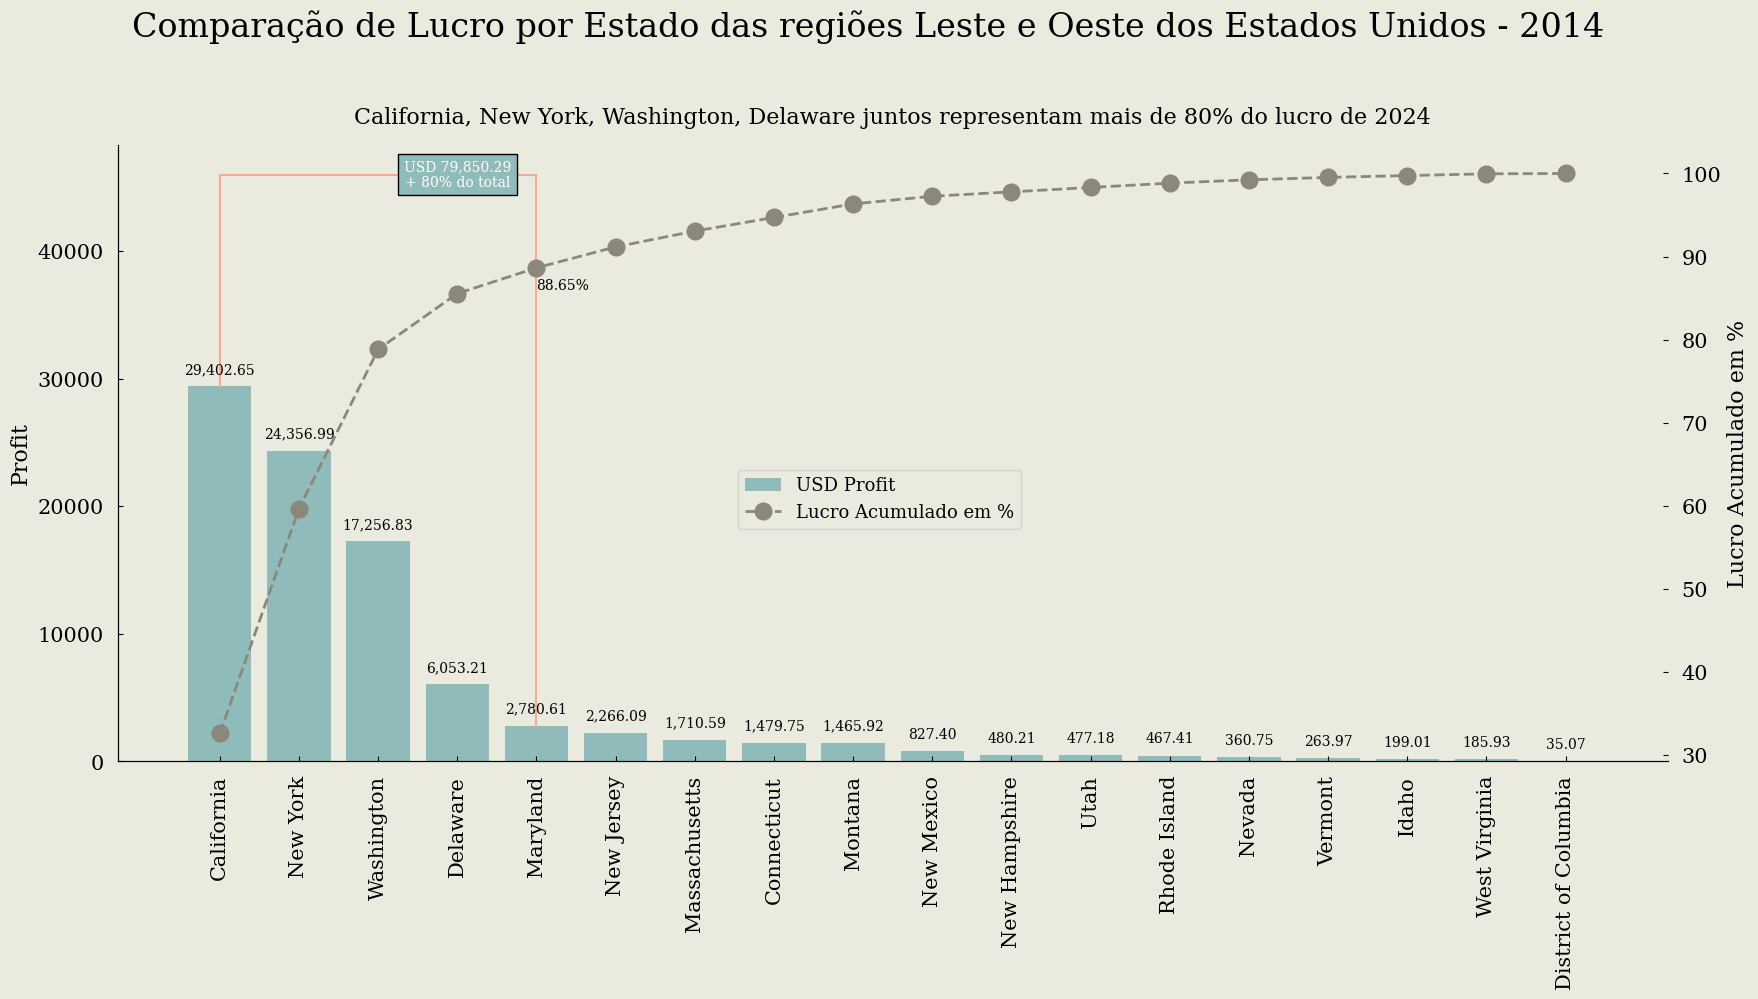

In [119]:
first = lets_see.iloc[0]['State']
sec = lets_see.iloc[1]['State']
third = lets_see.iloc[2]['State']
fourth = lets_see.iloc[3]['State']


fig,ax = plt.subplots(figsize=(20,8))


fig.suptitle('Comparação de Lucro por Estado das regiões Leste e Oeste dos Estados Unidos - 2014', y=1.05)

ax.set_title(f'{first}, {sec}, {third}, {fourth} juntos representam mais de 80% do lucro de 2024', pad=16)



ax.bar(lets_see['State'], height=lets_see['Profit'], color='#8fbcbb', label='USD Profit')




ax.set_xticklabels(rotation=90,labels=lets_see['State'])
ax.set_ylabel('Profit')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




ax2 = ax.twinx()
ax2.plot(lets_see['State'], lets_see['cum'], marker='o', linewidth=2, markersize=12, linestyle='dashed', label='Lucro Acumulado em %', color='#8B887B')
ax2.set_xticklabels(rotation=90,labels=lets_see['State'])
ax2.set_ylabel('Lucro Acumulado em %')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)




for i, valor in enumerate(lets_see['Profit']):
    ax.text(x=lets_see.iloc[i]['State'],
            y=valor+1000,
            s=f'{valor:,.2F}',
            ha='center')
    

y = lets_see.iloc[4]['cum']
ax2.text(x='Maryland', y=86, s=f'{y}%', ha='left')


soma = lets_see.iloc[0:5]['Profit'].sum()

ax.annotate(f'USD {soma:,.2F}\n+ 80% do total',
                  xy=('Delaware', 23000), 
                  xytext=(3, 46000), 
                  va="center", ha="center",
                  bbox=dict(facecolor='#8FBCBB',edgecolor='black'),
                  color='w')

fig.legend(loc='center')

rot = ['California','New York','Washington','Delaware','Maryland']
val = [46000,46000,46000,46000,46000]
rot2 = ['Maryland','Maryland']
val2 = [46000,2780]
rot3 = ['California','California']
val3 = [46000,29402]
ax.plot(rot,val, color='#FAA88F')
ax.plot(rot2,val2, color='#FAA88F')
ax.plot(rot3,val3, color='#FAA88F')


plt.show()

##### Grupo Grafico 4

In [120]:
raw_filter_data = raw_df.loc[(raw_df['Ano'] == '2014-01-01')]
raw_filter_data = raw_filter_data.loc[(raw_filter_data['Region'] == 'East') | (raw_filter_data['Region'] == 'West')]
raw_filter_data = raw_filter_data.loc[(raw_filter_data['State'] == 'California') | (raw_filter_data['State'] == 'New York') | (raw_filter_data['State'] == 'Maryland') | (raw_filter_data['State'] == 'Delaware') | (raw_filter_data['State'] == 'Washington')]

print(raw_filter_data['Ano'].unique())

print(raw_filter_data['Region'].unique())

print(raw_filter_data['State'].unique())


<DatetimeArray>
['2014-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]
['East' 'West']
['New York' 'California' 'Washington' 'Maryland' 'Delaware']


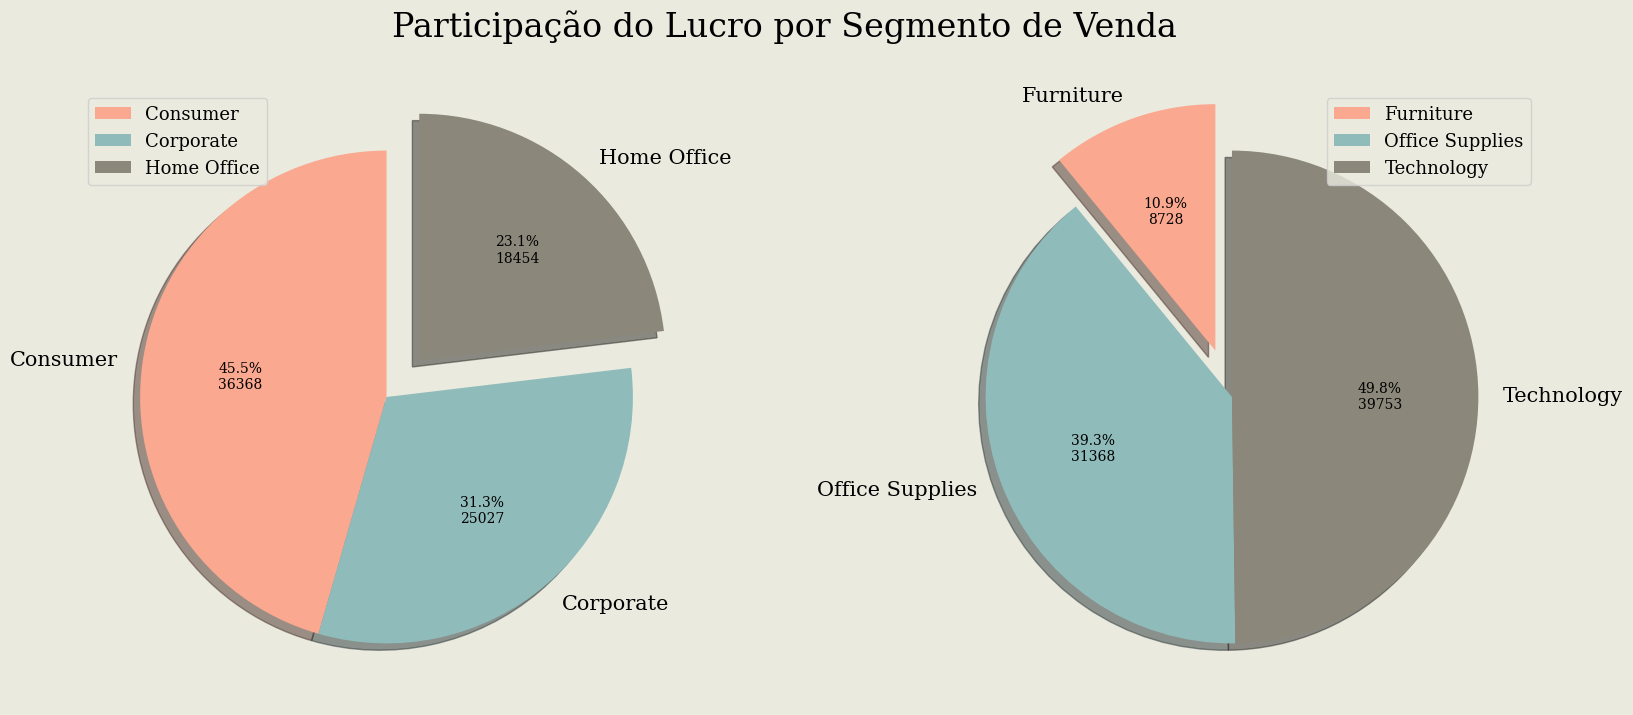

In [121]:
raw_filter_data_segment = raw_filter_data.groupby(by='Segment',as_index=False)['Profit'].sum()
raw_filter_data_category = raw_filter_data.groupby(by='Category', as_index=False)['Profit'].sum()
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d}".format(pct,absolute)
valores = raw_filter_data_category['Profit'].values
explode = [0,0,0.2]
explode2 = [0.2,0,0]

fig, ax = plt.subplots(1,2,figsize=(20,8))


fig.suptitle('Participação do Lucro por Segmento de Venda')
ax[0].pie(raw_filter_data_segment['Profit'], 
       labels=raw_filter_data_segment['Segment'].unique(), 
       autopct= lambda pct: func(pct,valores),
       shadow=True, 
       startangle=90, 
       textprops=dict(color='black'), 
       explode=explode)


ax[0].legend(loc='upper left')




ax[1].pie(raw_filter_data_category['Profit'], 
       labels=raw_filter_data_category['Category'].unique(), 
       autopct= lambda pct: func(pct,valores),
       shadow=True, 
       startangle=90, 
       textprops=dict(color='black'), 
       explode=explode2)


ax[1].legend(loc='upper right')

## - De certo, o boom de 2012 para 2014 se concentram nas regiões Leste e Oeste, nas cidades de California, New York, Maryland, Washnington e Delaware. Dentro disso, em 2014 os maiores lucros foram das categorias de Suprimentos de Escritório e Tecnologia bem distribuídos em Home Office, Consumo Próprio e Corporação 

##### Grupo Grafico 5

In [122]:
raw_filter_data

,Order Date,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ano,Mes
Row ID,,,,,,,,,,,,,
97,2014-10-11,Home Office,New York City,New York,East,Furniture,Furnishings,96.53,7,0.0,40.54,2014-01-01,2014-01-01
98,2014-06-18,Consumer,San Francisco,California,West,Office Supplies,Binders,51.31,3,0.2,17.96,2014-01-01,2014-01-01
111,2014-12-26,Corporate,New York City,New York,East,Furniture,Furnishings,41.96,2,0.0,10.91,2014-01-01,2014-01-01
142,2014-09-19,Corporate,San Francisco,California,West,Office Supplies,Art,8.82,3,0.0,2.38,2014-01-01,2014-01-01
143,2014-09-19,Corporate,San Francisco,California,West,Office Supplies,Envelopes,10.86,3,0.0,5.10,2014-01-01,2014-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,2014-11-25,Consumer,San Francisco,California,West,Technology,Accessories,223.58,14,0.0,87.20,2014-01-01,2014-01-01
9991,2014-02-27,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.96,2,0.0,15.63,2014-01-01,2014-01-01
9992,2014-02-27,Consumer,Costa Mesa,California,West,Technology,Phones,258.58,2,0.2,19.39,2014-01-01,2014-01-01


In [123]:
raw_filter_data_sub_category = raw_filter_data.loc[(raw_filter_data['Category'] != 'Furniture')]
raw_filter_data_sub_category =raw_filter_data_sub_category.groupby(by='Sub-Category', as_index=False)['Profit'].sum()

In [124]:
raw_filter_data_sub_category.sort_values(by='Profit', inplace=True, ascending=False)

In [125]:
soma_sub = raw_filter_data_sub_category['Profit'].sum()
raw_filter_data_sub_category['participation'] = round(((raw_filter_data_sub_category['Profit']/soma_sub)*100),2)

In [126]:
raw_filter_data_sub_category['acumulado'] = raw_filter_data_sub_category['participation'].cumsum()
raw_filter_data_sub_category

,Sub-Category,Profit,participation,acumulado
4,Copiers,19642.89,27.62,27.62
3,Binders,12369.42,17.39,45.01
0,Accessories,8614.16,12.11,57.12
10,Phones,6288.11,8.84,65.96
1,Appliances,5466.82,7.69,73.65
9,Paper,5236.47,7.36,81.01
8,Machines,5207.86,7.32,88.33
11,Storage,5202.71,7.32,95.65
2,Art,1148.67,1.62,97.27
7,Labels,1135.06,1.60,98.87


In [127]:
soma_3 = raw_filter_data_sub_category.iloc[0:8]['Profit'].sum()
maximo = raw_filter_data_sub_category.loc[raw_filter_data_sub_category['acumulado'] < 96].max()
maximo = maximo[3]

In [128]:
raw_filter_data_sub_category.iloc[0:6]

,Sub-Category,Profit,participation,acumulado
4,Copiers,19642.89,27.62,27.62
3,Binders,12369.42,17.39,45.01
0,Accessories,8614.16,12.11,57.12
10,Phones,6288.11,8.84,65.96
1,Appliances,5466.82,7.69,73.65
9,Paper,5236.47,7.36,81.01


In [129]:
a = raw_df.groupby(by='Ano',as_index=False).sum(numeric_only=True)
a.set_index('Ano', inplace=True)
soma_2014 = a.iloc[3]['Profit']

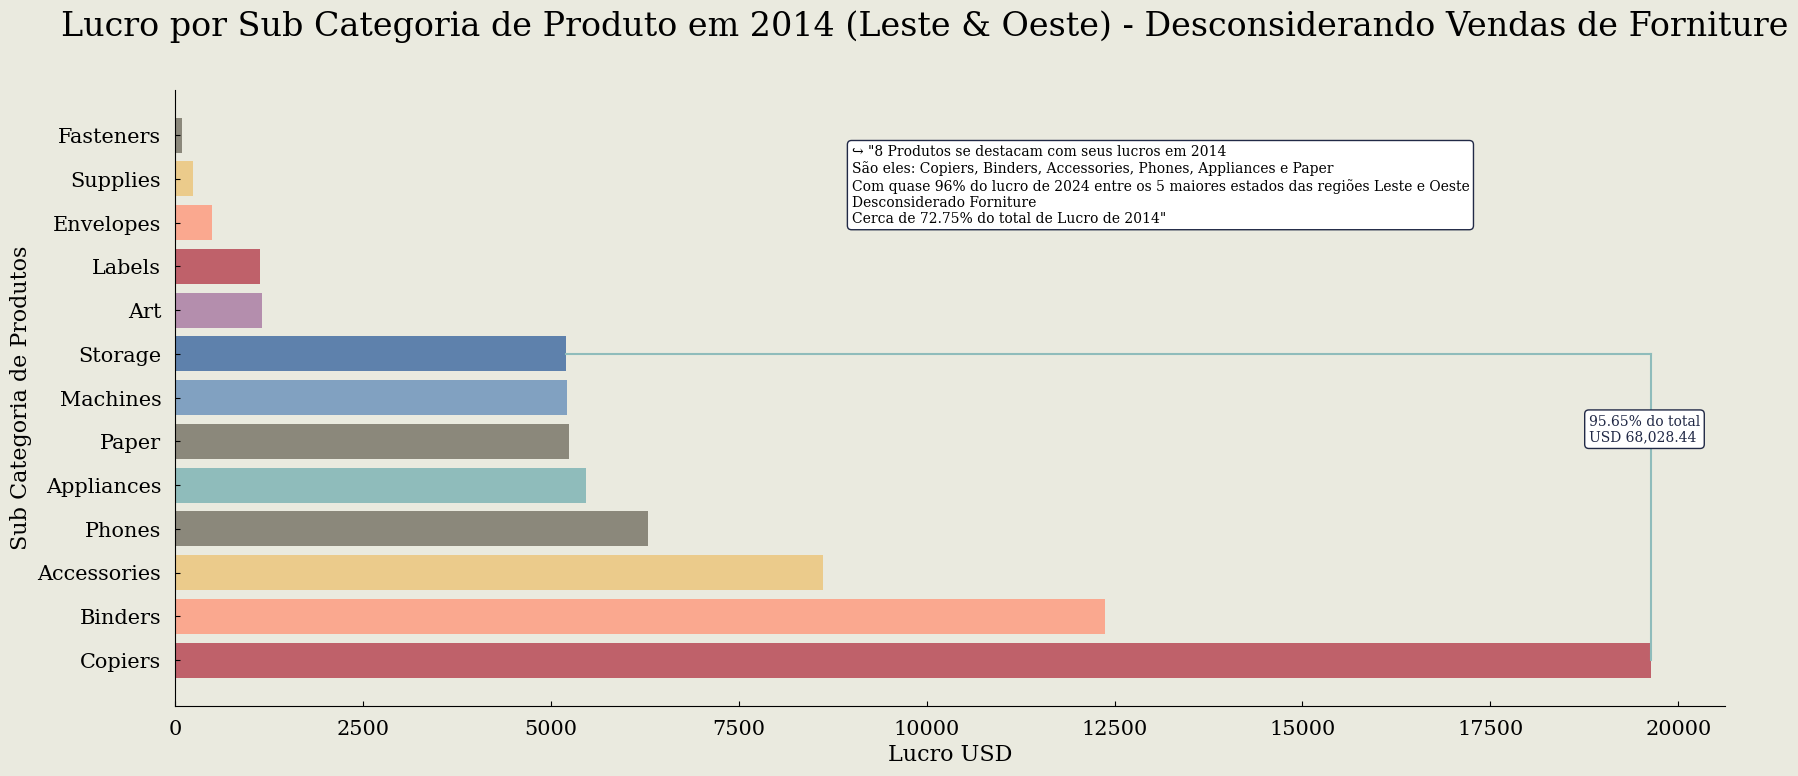

In [130]:
colors = NordColors(red='#bf616a', orange='#FAA88F', yellow='#ebcb8b',
    green='#8B887B', greenish='#8fbcbb', lightblue='#8B887B',
    blue='#81a1c1', darkblue='#5e81ac', purple='#b48ead')

fig,ax = plt.subplots(figsize=(20,8))
fig.suptitle('Lucro por Sub Categoria de Produto em 2014 (Leste & Oeste) - Desconsiderando Vendas de Forniture')
ax.barh(y=raw_filter_data_sub_category['Sub-Category'], width = raw_filter_data_sub_category['Profit'],color=colors)
ax.set_ylabel('Sub Categoria de Produtos')
ax.set_xlabel('Lucro USD')
y = ['Storage','Storage']
x = [5202.71,19642.89]
plt.plot(x,y, color='#8FBCBB')

y = [0,1,2,3,4,5,6,7]
x = [19642.89,19642.89,19642.89,19642.89,19642.89,19642.89,19642.89,19642.89]
plt.plot(x,y,color='#8FBCBB')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.annotate(
    f'{maximo:,.2F}% do total\nUSD {soma_3:,.2F}',
    xy=(18700,'Paper'),
    xytext=(6,'Copiers'), textcoords='offset points',
    bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'),
              color='#212946')

ax.text(x=9000, y='Envelopes', s=f'↪ "8 Produtos se destacam com seus lucros em 2014\nSão eles: Copiers, Binders, Accessories, Phones, Appliances e Paper\nCom quase 96% do lucro de 2024 entre os 5 maiores estados das regiões Leste e Oeste\nDesconsiderado Forniture\nCerca de {(soma_3/soma_2014):,.2%} do total de Lucro de 2014"',
bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))

plt.show()

## - Pelos gráficos podemos definir que os produtos Tecnológicos e de escritório como: Copiadoras, Fichários, Acessórios, Telefone, Appliances e Papel, armazenamentos, máquinas, em 2014 nas regiões Leste e Oeste, mais precisamento em California, New York, Washington, Delaware e Maryland, são os principais responsáveis pelo alto boom do lucro de 2014 representando mais de 70% do lucro no ano

In [131]:
df = raw_df.loc[(raw_df['Ano'] == '2012-01-01') | (raw_df['Ano'] == '2014-01-01')]
df = df.loc[(df['Region'] == 'East') | (df['Region'] == 'West')]
df = df.loc[(df['State'] == 'California') | (df['State'] == 'New York') | (df['State'] == 'Washington') | (df['State'] == 'Delaware') | (df['State'] == 'Maryland')]
df = df.loc[(df['Category'] == 'Technology') | (df['Category'] == 'Office Supplies')]
df = df.loc[(df['Sub-Category'] == 'Copiers') | (df['Sub-Category'] == 'Binders') | (df['Sub-Category'] == 'Accessories') | (df['Sub-Category'] == 'Phones') | (df['Sub-Category'] == 'Appliances') | (df['Sub-Category'] == 'Paper') | (df['Sub-Category'] == 'Machines') | (df['Sub-Category'] == 'Storage')]


print(df['Ano'].unique())
print(df['Region'].unique())
print(df['State'].unique())
print(df['Category'].unique())
print(df['Sub-Category'].unique())


<DatetimeArray>
['2012-01-01 00:00:00', '2014-01-01 00:00:00']
Length: 2, dtype: datetime64[ns]
['West' 'East']
['California' 'New York' 'Washington' 'Maryland' 'Delaware']
['Technology' 'Office Supplies']
['Accessories' 'Binders' 'Paper' 'Storage' 'Phones' 'Copiers' 'Appliances'
 'Machines']


C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\590118538.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(rotation=90,labels=_2012['Sub-Category'])
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\590118538.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(rotation=90,labels=_2014['Sub-Category'])


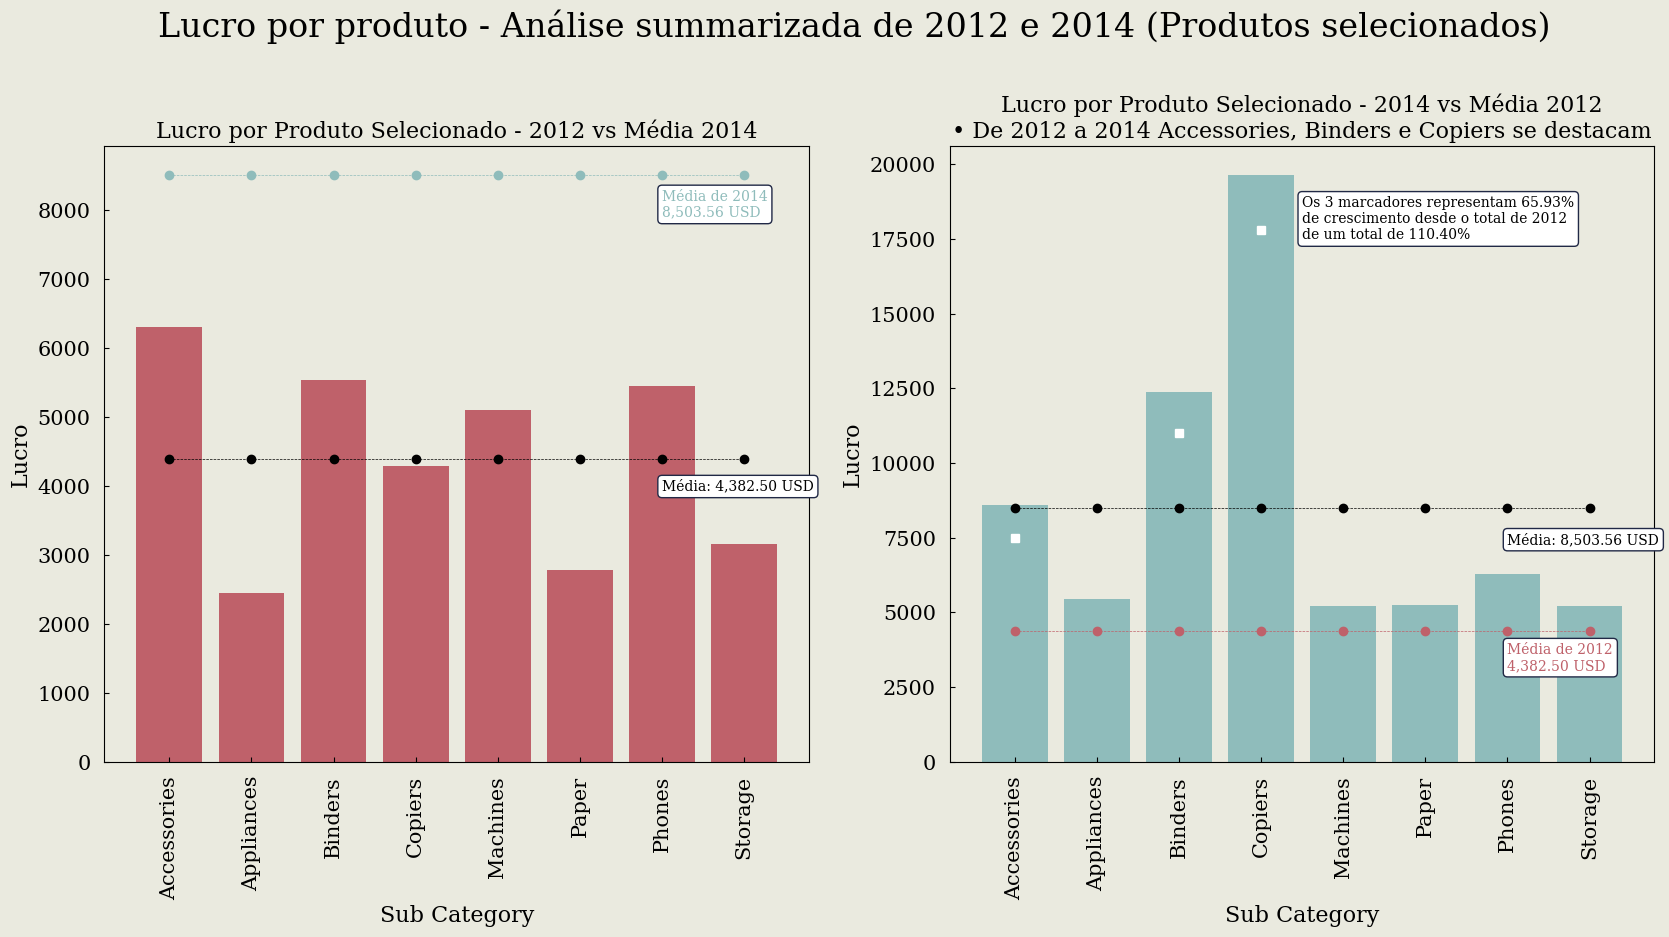

In [132]:
df_2012 = df.loc[df['Ano'] == '2012-01-01']
df_2014 = df.loc[df['Ano'] == '2014-01-01']
_2012 = df_2012.groupby(by='Sub-Category',as_index=False)['Profit'].sum()
_2014 = df_2014.groupby(by='Sub-Category',as_index=False)['Profit'].sum()

total_2014 = (_2014['Profit'].sum())
total_2012 = a.iloc[1]['Profit']
cresc_total = total_2014/total_2012



__2014_filtro_top_3 = _2014.loc[(_2014['Sub-Category'] == 'Accessories') | (_2014['Sub-Category'] == 'Binders') | (_2014['Sub-Category'] == 'Copiers')]
total_2014_top_3 = __2014_filtro_top_3['Profit'].sum()
cresc_top_3 = total_2014_top_3/total_2012


fig,ax = plt.subplots(1,2,figsize=(20,8))

fig.suptitle('Lucro por produto - Análise summarizada de 2012 e 2014 (Produtos selecionados)', y=1.05)

ax[0].bar(x=_2012['Sub-Category'], height=_2012['Profit'], color='#bf616a')
ax[0].set_xticklabels(rotation=90,labels=_2012['Sub-Category'])
ax[0].set_xlabel('Sub Category')
ax[0].set_ylabel('Lucro')
ax[0].set_title('Lucro por Produto Selecionado - 2012 vs Média 2014')

ax[1].bar(x=_2014['Sub-Category'], height=_2014['Profit'], color='#8FBCBB')
ax[1].set_xticklabels(rotation=90,labels=_2014['Sub-Category'])
ax[1].set_xlabel('Sub Category')
ax[1].set_ylabel('Lucro')
ax[1].set_title('Lucro por Produto Selecionado - 2014 vs Média 2012\n• De 2012 a 2014 Accessories, Binders e Copiers se destacam')


_2014_m = _2014['Profit'].mean()
rot2 = [0,1,2,3,4,5,6,7]
valor2 = [_2014_m,_2014_m,_2014_m,_2014_m,_2014_m,_2014_m,_2014_m,_2014_m]
_2012_m = _2012['Profit'].mean()
rot = [0,1,2,3,4,5,6,7]
valor = [_2012_m,_2012_m,_2012_m,_2012_m,_2012_m,_2012_m,_2012_m,_2012_m]




ax[0].plot(rot, valor, linewidth=0.5, linestyle='dashed',marker='o', color='black')
ax[0].text(x=6, y=_2012_m-450, s=f'Média: {_2012_m:,.2F} USD',color='black', bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))
ax[0].plot(rot2, valor2, linewidth=0.5, linestyle='dashed',marker='o', color='#8fbcbb')
ax[0].text(x=6, y=_2014_m-600, s=f'Média de 2014\n{_2014_m:,.2F} USD', color='#8fbcbb', bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))



ax[1].plot(rot2, valor2, linewidth=0.5, linestyle='dashed',marker='o', color='black')
ax[1].text(x=6, y=_2014_m-1200, s=f'Média: {_2014_m:,.2F} USD', color='black', bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))
ax[1].plot(rot, valor, linewidth=0.5, linestyle='dashed',marker='o', color='#bf616a')
ax[1].text(x=6, y=_2012_m-1300, s=f'Média de 2012\n{_2012_m:,.2F} USD',color='#bf616a', bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))
ax[1].text(x=3.5,y=17500,s=f'Os 3 marcadores representam {cresc_top_3:,.2%}\nde crescimento desde o total de 2012\nde um total de {cresc_total:,.2%}'
           , bbox=dict(boxstyle="round", facecolor='#FFFFFF', 
              edgecolor='#212946'))

ax[1].plot(3,17800,marker='s',color='w')
ax[1].plot(0,7500,marker='s',color='w')
ax[1].plot(2,11000,marker='s',color='w')

plt.show()

### Mediante tudo, é possível concluir que os Produto "Accessories", "Binders", "Copiers", presentam quase 100% do crescimento, mantendo suas médias muito acima do exercido em 2012

In [324]:
dataset = df.copy()

In [325]:
dataset = dataset.loc[(dataset['Sub-Category'] == 'Copiers') | (dataset['Sub-Category'] == 'Binders')]
dataset.shape

(315, 13)

In [326]:
dataset

,Order Date,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Ano,Mes
Row ID,,,,,,,,,,,,,
64,2012-11-24,Consumer,Los Angeles,California,West,Office Supplies,Binders,25.82,6,0.2,9.36,2012-01-01,2012-01-01
98,2014-06-18,Consumer,San Francisco,California,West,Office Supplies,Binders,51.31,3,0.2,17.96,2014-01-01,2014-01-01
261,2014-02-12,Consumer,New York City,New York,East,Office Supplies,Binders,17.52,5,0.2,6.13,2014-01-01,2014-01-01
274,2012-07-30,Consumer,San Francisco,California,West,Office Supplies,Binders,10.92,3,0.2,4.10,2012-01-01,2012-01-01
335,2012-01-09,Consumer,Los Angeles,California,West,Office Supplies,Binders,4.75,1,0.2,1.60,2012-01-01,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9924,2012-03-20,Corporate,New York City,New York,East,Office Supplies,Binders,49.85,3,0.2,16.82,2012-01-01,2012-01-01
9926,2012-03-20,Corporate,New York City,New York,East,Office Supplies,Binders,1087.94,8,0.2,353.58,2012-01-01,2012-01-01
9931,2012-11-13,Consumer,San Bernardino,California,West,Office Supplies,Binders,9.87,2,0.2,3.46,2012-01-01,2012-01-01


In [327]:
a = dataset[dataset['Ano'] == '2014-01-01']
a.iloc[:, 7:11].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,199.0,419.380503,1584.249407,1.44,15.58,34.76,109.885,13999.96
Quantity,199.0,4.160804,2.308148,1.00,2.00,4.00,5.000,14.00
Discount,199.0,0.188945,0.045819,0.00,0.20,0.20,0.200,0.20
Profit,199.0,160.865879,685.359479,0.50,5.43,11.56,37.890,6719.98


In [328]:
b = dataset[dataset['Ano'] == '2012-01-01']
b.iloc[:, 7:11].describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,116.0,226.456121,576.867929,3.17,11.915,30.12,85.255,3149.93
Quantity,116.0,3.758621,2.297903,1.00,2.000,3.00,5.000,13.00
Discount,116.0,0.181034,0.058850,0.00,0.200,0.20,0.200,0.20
Profit,116.0,84.684224,237.659157,0.99,4.255,10.71,31.500,1480.47


In [329]:
print(f'Tamanho 2014 {a.shape}')
print(f'Tamanho 2012 {b.shape}')

Tamanho 2014 (199, 13)
Tamanho 2012 (116, 13)


In [330]:
soma_qtd_2012 = b['Quantity'].sum()
media_qtd_2012 = b['Quantity'].mean()
desvio_qtd_2012 = b['Quantity'].std()
mediana_qtd_2012 = b['Quantity'].median()
max_qtd_2012 = b['Quantity'].max()
min_qtd_2012 = b['Quantity'].min()

soma_qtd_2014 = a['Quantity'].sum()
media_qtd_2014 = a['Quantity'].mean()
desvio_qtd_2014 = a['Quantity'].std()
mediana_qtd_2014 = a['Quantity'].median()
max_qtd_2014 = a['Quantity'].max()
min_qtd_2014 = a['Quantity'].min()

In [331]:
print(f'Quantidade Vendida em 2012 {soma_qtd_2012} com Média de {media_qtd_2012:,.2F} e desvio de {desvio_qtd_2012:,.2F} e mediana de {mediana_qtd_2012:,.2F}')
print(f'Quantidade Vendida em 2014 {soma_qtd_2014} com Média de {media_qtd_2014:,.2F} e desvio de {desvio_qtd_2014:,.2F} e mediana de {mediana_qtd_2014:,.2F}')


Quantidade Vendida em 2012 436 com Média de 3.76 e desvio de 2.30 e mediana de 3.00
Quantidade Vendida em 2014 828 com Média de 4.16 e desvio de 2.31 e mediana de 4.00


In [332]:
soma_venda_2012 = b['Sales'].sum()
media_venda_2012 = b['Sales'].mean()
desvio_venda_2012 = b['Sales'].std()
mediana_venda_2012 = b['Sales'].median()
max_venda_2012 = b['Sales'].max()
min_venda_2012 = b['Sales'].min()

soma_venda_2014 = a['Sales'].sum()
media_venda_2014 = a['Sales'].mean()
desvio_venda_2014 = a['Sales'].std()
mediana_venda_2014 = a['Sales'].median()
max_venda_2014 = a['Sales'].max()
min_venda_2014 = a['Sales'].min()

In [333]:
print(f'Quantidade Vendida em 2012 {soma_venda_2012:,.2F} com Média de {media_venda_2012:,.2F} e desvio de {desvio_venda_2012:,.2F} e mediana de {mediana_venda_2012:,.2F}')
print(f'Quantidade Vendida em 2014 {soma_venda_2014:,.2F} com Média de {media_venda_2014:,.2F} e desvio de {desvio_venda_2014:,.2F} e mediana de {mediana_venda_2014:,.2F}')

Quantidade Vendida em 2012 26,268.91 com Média de 226.46 e desvio de 576.87 e mediana de 30.12
Quantidade Vendida em 2014 83,456.72 com Média de 419.38 e desvio de 1,584.25 e mediana de 34.76


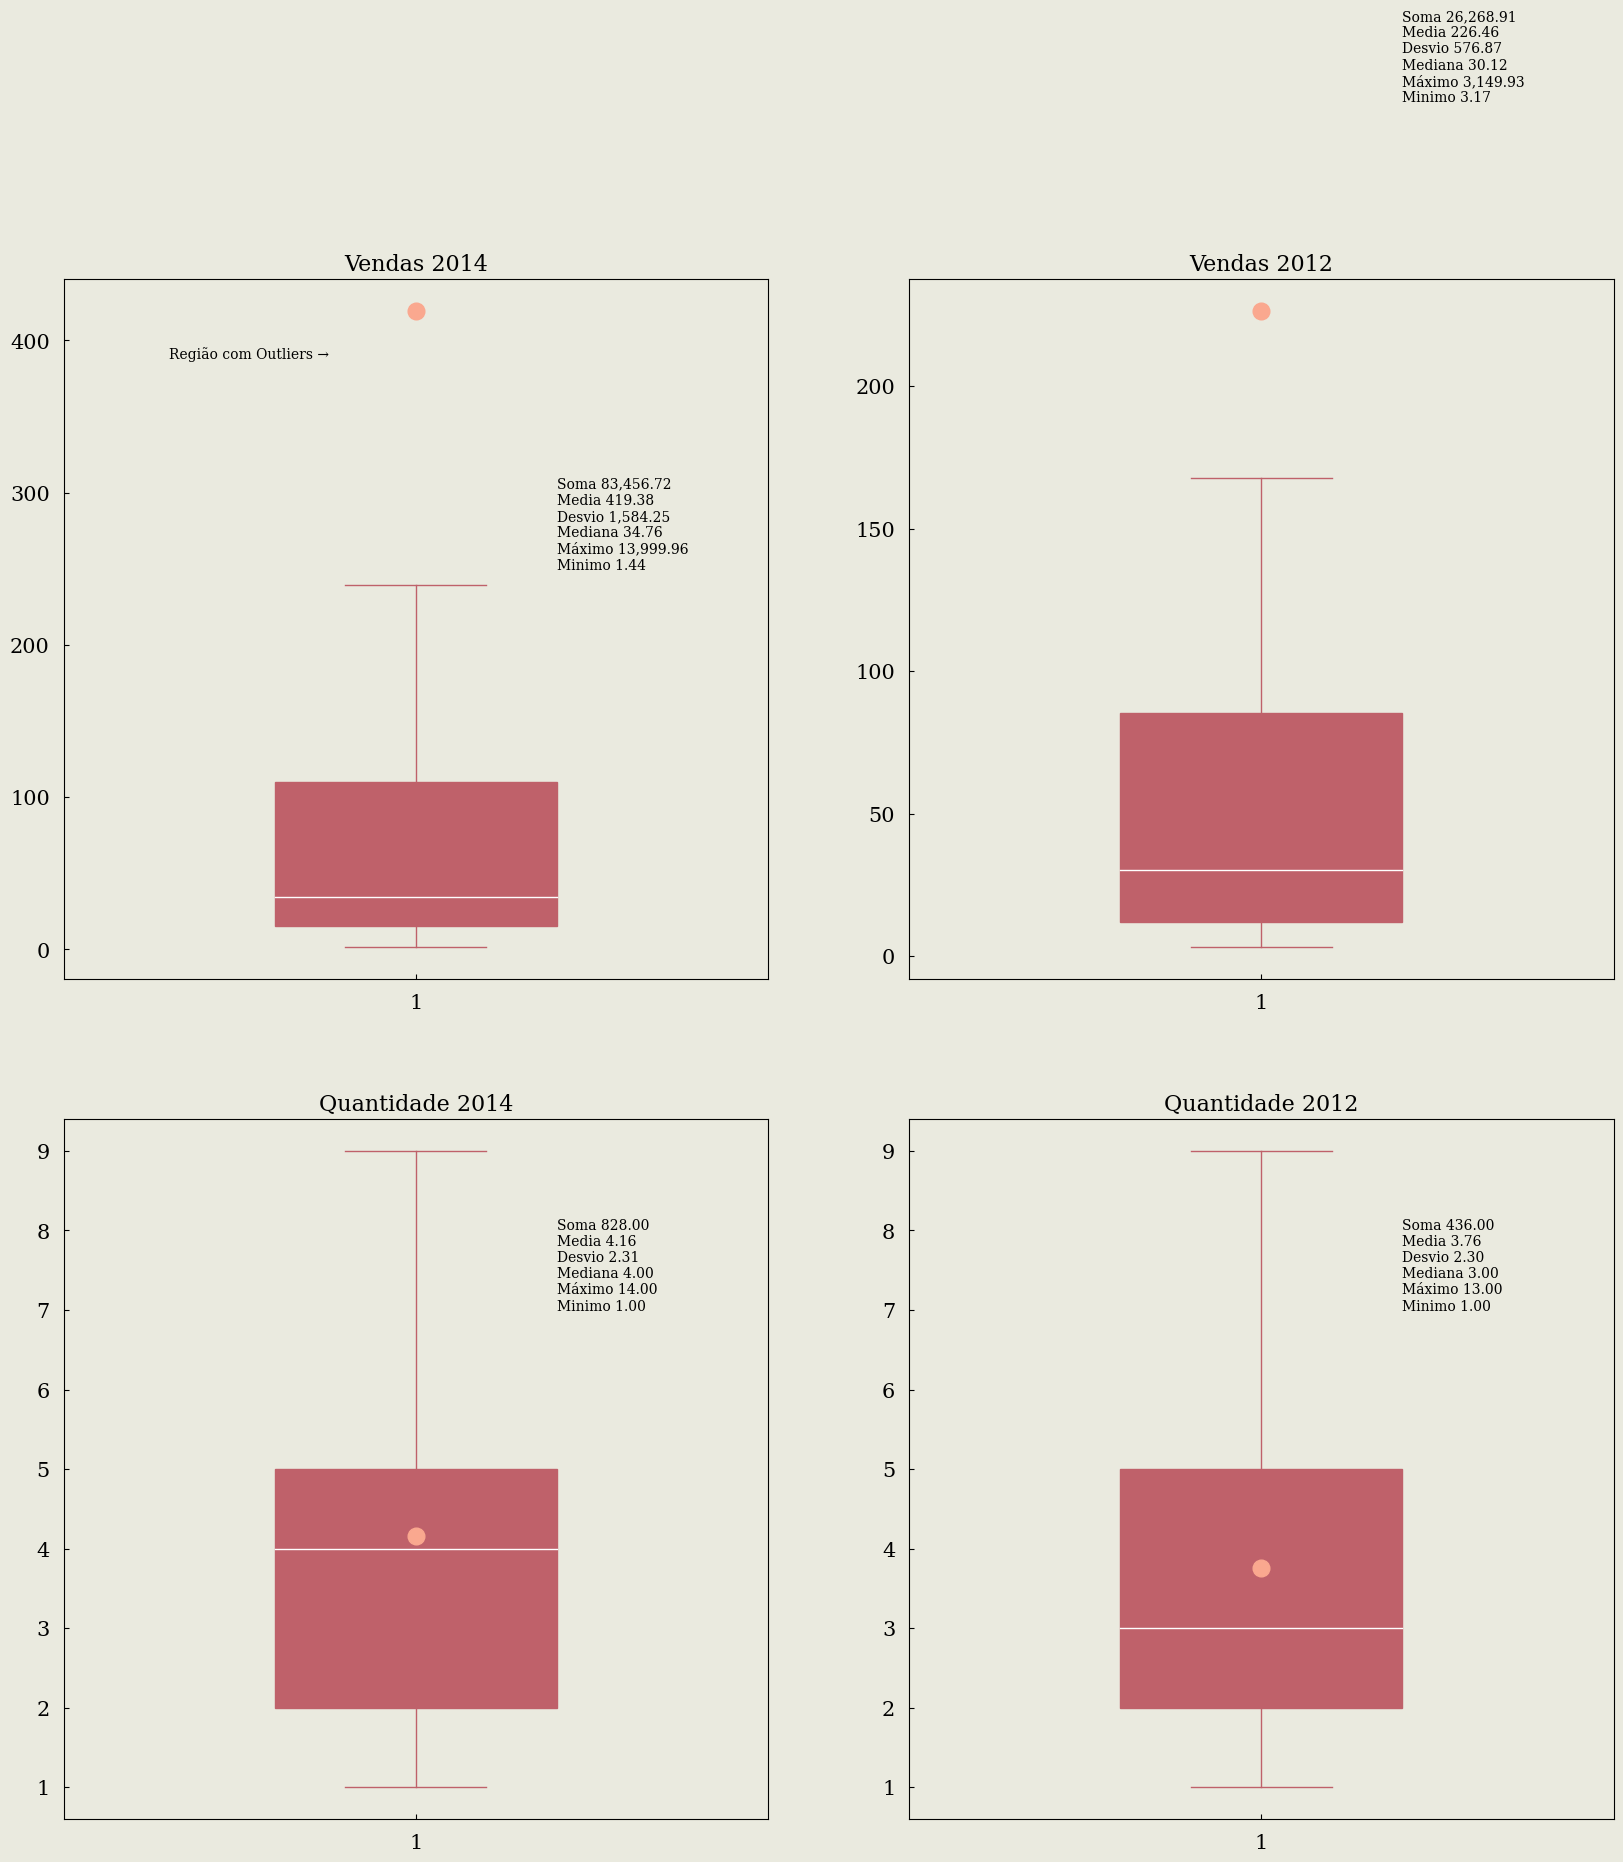

In [334]:
fig, ax = plt.subplots(2,2,figsize=(20,20))
c ='#BF616A'
box_width = 0.4
d = '#8FBCBB'
ax[0,0].boxplot(a['Sales'],positions=[1], widths=box_width, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='w'))
ax[0,0].set_title('Vendas 2014')
ax[0,0].plot(1, a['Sales'].mean(),marker='o', markersize=12)



ax[0,1].boxplot(b['Sales'],positions=[1], widths=box_width, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='w'))
ax[0,1].set_title('Vendas 2012')
ax[0,1].plot(1, b['Sales'].mean(),marker='o', markersize=12)



ax[1,0].boxplot(a['Quantity'],positions=[1], widths=box_width, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='w'))
ax[1,0].set_title('Quantidade 2014')
ax[1,0].plot(1, a['Quantity'].mean(),marker='o', markersize=12)



ax[1,1].boxplot(b['Quantity'],positions=[1], widths=box_width, patch_artist=True, showfliers=False,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color='w'))
ax[1,1].set_title('Quantidade 2012')
ax[1,1].plot(1, b['Quantity'].mean(),marker='o', markersize=12)




ax[0,0].text(x= 1.2, y = 250,
             s = f'Soma {soma_venda_2014:,.2F}\nMedia {media_venda_2014:,.2F}\nDesvio {desvio_venda_2014:,.2F}\nMediana {mediana_venda_2014:,.2F}\nMáximo {max_venda_2014:,.2F}\nMinimo {min_venda_2014:,.2F}')


ax[0,1].text(x= 1.2, y = 300,
             s = f'Soma {soma_venda_2012:,.2F}\nMedia {media_venda_2012:,.2F}\nDesvio {desvio_venda_2012:,.2F}\nMediana {mediana_venda_2012:,.2F}\nMáximo {max_venda_2012:,.2F}\nMinimo {min_venda_2012:,.2F}')


ax[1,0].text(x= 1.2, y = 7,
             s = f'Soma {soma_qtd_2014:,.2F}\nMedia {media_qtd_2014:,.2F}\nDesvio {desvio_qtd_2014:,.2F}\nMediana {mediana_qtd_2014:,.2F}\nMáximo {max_qtd_2014:,.2F}\nMinimo {min_qtd_2014:,.2F}')


ax[1,1].text(x= 1.2, y = 7,
             s = f'Soma {soma_qtd_2012:,.2F}\nMedia {media_qtd_2012:,.2F}\nDesvio {desvio_qtd_2012:,.2F}\nMediana {mediana_qtd_2012:,.2F}\nMáximo {max_qtd_2012:,.2F}\nMinimo {min_qtd_2012:,.2F}')



ax[0,0].text(x=0.65, y=388, s=f'Região com Outliers →')

plt.show()

In [335]:
a['Lucro_Und'] = a['Profit']/a['Quantity']
a['Custo'] = a['Profit']-a['Sales']
a['Custo_und'] = a['Custo']/a['Quantity']
a['Preço'] = a['Sales']/a['Quantity']

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\3734786998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Lucro_Und'] = a['Profit']/a['Quantity']
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\3734786998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Custo'] = a['Profit']-a['Sales']
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\3734786998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [336]:
b['Lucro_Und'] = b['Profit']/b['Quantity']
b['Custo'] = b['Profit']-b['Sales']
b['Custo_und'] = b['Custo']/b['Quantity']
b['Preço'] = b['Sales']/b['Quantity']

C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\1386932199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Lucro_Und'] = b['Profit']/b['Quantity']
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\1386932199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Custo'] = b['Profit']-b['Sales']
C:\Users\Luis Henrique\AppData\Local\Temp\ipykernel_13428\1386932199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

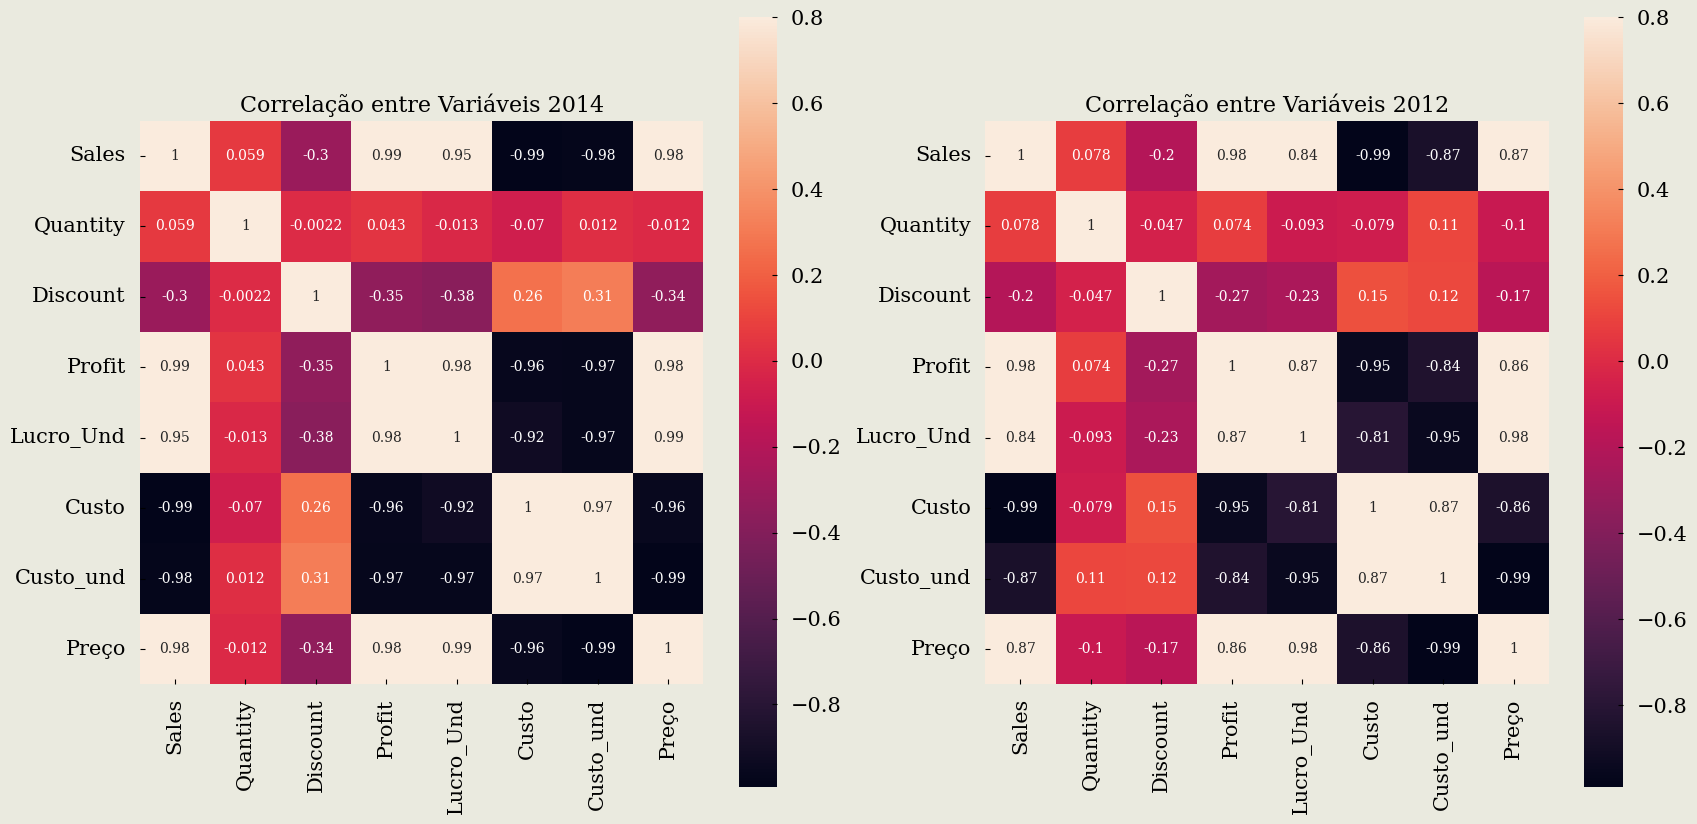

In [337]:
c = a.copy()
c = a.drop(columns={'Order Date','Segment','City','State','Region','Category','Sub-Category','Ano','Mes'}).corr()
commrat = c


d = b.copy()
d = b.drop(columns={'Order Date','Segment','City','State','Region','Category','Sub-Category','Ano','Mes'}).corr()
commrat2 = d

mask = np.triu(np.ones_like(commrat, dtype = bool))



fig,ax = plt.subplots(1,2,figsize=(20,10))
_ = sns.heatmap(commrat, vmax = 0.8, square = True, annot = True,ax=ax[0])
ax[0].set_title('Correlação entre Variáveis 2014')
#plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
#plt.savefig('corr.png', dpi=1200)
_ = sns.heatmap(commrat2, vmax = 0.8,  square = True, annot = True,ax=ax[1])
ax[1].set_title('Correlação entre Variáveis 2012')

plt.show()

### Tudo indica uma variação maior nas receitas de 2014 e 2012 - como as quantidades não explicam uma grande variação, apenas uma maior soma, pode-se deduzir que os preços influenciaram na maior parte, seja pelo aumento ou pela venda de produtos mais caros, mas para explicar melhor, vamos analisar as médias de receitas de 2012 e 2014 em um teste estatístico

#### Para isso vamos coletar amostras de 100 elementos de cada grupo (2012 e 2014)

In [228]:
a.shape

(755, 17)

In [340]:
amostra = a.sample(150)


In [342]:
from scipy import stats

z = np.abs(stats.zscore(amostra['Sales']))
threshold = 3
test = z >= 3
amostra['outliers'] = z

amostra = amostra.loc[amostra['outliers'] <= 3]

In [344]:
# Função para aplicar logaritmo em uma coluna do DataFrame
def aplicar_logaritmo_em_coluna(df, coluna, constante=1):
    """
    Aplica a função logarítmica em uma coluna específica do DataFrame,
    adicionando uma constante para evitar log de zero ou valores negativos.
    
    Parâmetros:
        - df: DataFrame do Pandas.
        - coluna: Nome da coluna onde aplicar o logaritmo.
        - constante: Constante a ser adicionada a cada valor da coluna.
        
    Retorna:
        - DataFrame com a coluna especificada após a aplicação do logaritmo.
    """
    # Substituir NaN por zero (ou qualquer valor que faça sentido no seu contexto)
    df[coluna] = df[coluna].fillna(0)
    
    # Filtrar valores menores ou iguais a zero e adicionar a constante
    df = df[df[coluna] + constante > 0]
    
    # Aplicar o logaritmo
    df[coluna] = np.log(df[coluna] + constante)
    
    return df


# Exemplo de uso com dados fictícios

amostra = aplicar_logaritmo_em_coluna(amostra, 'Sales')
amostra = aplicar_logaritmo_em_coluna(amostra, 'Preço')

Coeficiente de interceptação: -0.4921719990267002
Coeficiente de inclinação: 0.8213456730267701
Sumário do modelo:
                            OLS Regression Results                            
Dep. Variable:                  Preço   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     668.3
Date:                Sun, 19 May 2024   Prob (F-statistic):           2.33e-55
Time:                        22:02:53   Log-Likelihood:                -103.35
No. Observations:                 143   AIC:                             210.7
Df Residuals:                     141   BIC:                             216.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

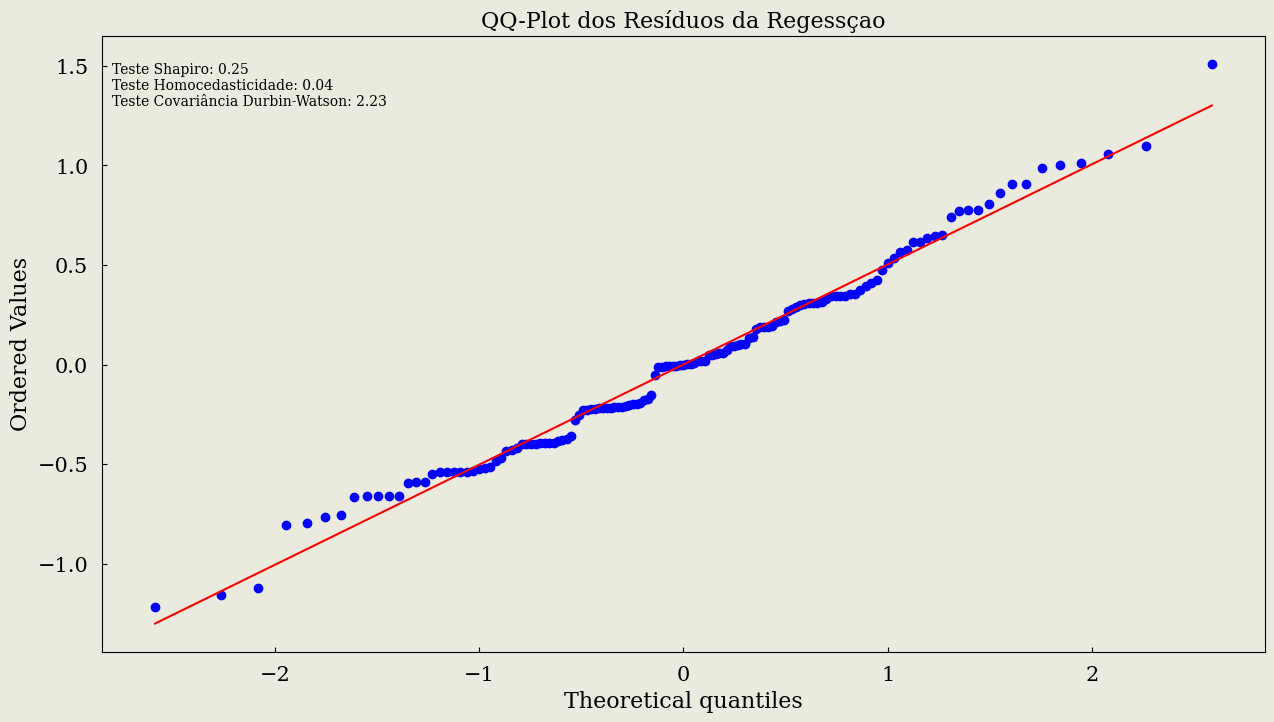

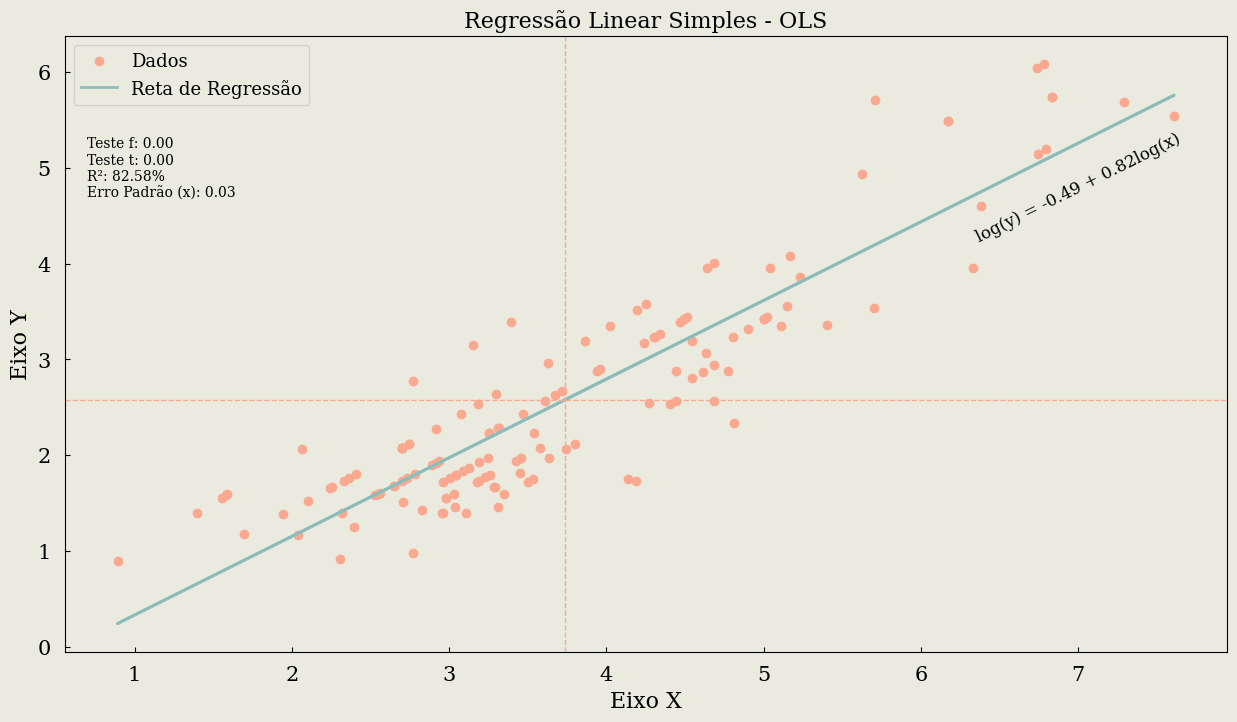

log(y) = -0.49 + 0.82log(x)


In [408]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# Função para realizar a regressão linear simples e verificar os pressupostos
def regressao_linear_simples(x, y):
    # Adicionando uma coluna de constantes à matriz de variáveis explicativas
    x_constante = sm.add_constant(x)

    # Ajustando o modelo de regressão linear aos dados
    model = sm.OLS(y, x_constante).fit()

    # Coeficientes
    coeficientes = model.params
    intercept = model.params[0]
    coeficiente = model.params[1]
    slope = coeficientes[1]
    print(f"Coeficiente de interceptação: {intercept}")
    print(f"Coeficiente de inclinação: {coeficiente}")

    # Estatísticas do modelo
    print("Sumário do modelo:")
    print(model.summary())

    # R² do modelo
    r_squared = model.rsquared
    print(f"R² do modelo: {r_squared}")

    # Erro padrão dos coeficientes
    stderr = model.bse
    stderr_intercept = stderr[0]
    stderr_coeficiente = stderr[1]
    print(f"Erro padrão do coeficiente de interceptação: {stderr_intercept}")
    print(f"Erro padrão do coeficiente de inclinação: {stderr_coeficiente}")

    # Intervalos de confiança dos coeficientes
    intervalo_confianca = model.conf_int()
    intervalo_intercept = intervalo_confianca.iloc[0]
    intervalo_coeficiente = intervalo_confianca.iloc[1]
    print(f"Intervalo de confiança do coeficiente de interceptação: {intervalo_intercept}")
    print(f"Intervalo de confiança do coeficiente de inclinação: {intervalo_coeficiente}")

    # Obtendo os resíduos do modelo
    residuos = model.resid

    # Teste de Shapiro-Wilk para normalidade dos resíduos
    stat, p_valor_shapiro = shapiro(residuos)
    print(f"Teste de Shapiro-Wilk:\nEstatística de teste: {stat}\nValor-p: {p_valor_shapiro}")

        # Teste de Durbin-Watson
    dw_statistic = sm.stats.stattools.durbin_watson(residuos)
    print("Teste de Durbin-Watson:")
    print("Estatística de teste:", dw_statistic)

    # Teste White para heterocedasticidade
    white_statistic, p_valor_white, _, _ = het_white(residuos, x_constante)
    print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")

    # Teste F
    f_statistic = model.fvalue
    p_valor_f = model.f_pvalue
    print(f"Teste F:\nEstatística de teste: {f_statistic}\nValor-p: {p_valor_f}")

    # Teste t da variável x
    t_statistic_x = model.tvalues[1]
    p_valor_t_x = model.pvalues[1]
    print(f"Teste t da variável x:\nEstatística de teste: {t_statistic_x}\nValor-p: {p_valor_t_x}")


    # Gráfico QQ-Plot dos resíduos
    plt.subplots(figsize=(15,8))
    probplot(residuos, dist="norm", plot=plt)
    plt.title('QQ-Plot dos Resíduos da Regessçao')
    plt.annotate(f'Teste Shapiro: {p_valor_shapiro:,.2F}\nTeste Homocedasticidade: {p_valor_white:,.2F}\nTeste Covariância Durbin-Watson: {dw_statistic:,.2F}',
                 xy =(-2.8,1.3))
    plt.show()


    # Gráfico de dispersão dos dados com a reta de regressão
    plt.subplots(figsize=(15,8))
    plt.scatter(x, y, label='Dados')
    plt.plot(x, model.predict(x_constante), color='#8fbcbb', linewidth=2, label='Reta de Regressão')
    plt.axhline(y=np.mean(y), linestyle='--', linewidth=1)
    plt.axvline(x=np.mean(x), linestyle='--', linewidth=1)
    plt.xlabel('Eixo X')
    plt.ylabel('Eixo Y')
    plt.title('Regressão Linear Simples - OLS')
    plt.legend()
    angle = np.degrees(np.arctan(slope))
    plt.text(7, 4.8, f'log(y) = {round((intercept),2)} + {round((coeficiente),2)}log(x)', fontsize=12, rotation=angle-13, ha='center'
             , va='center')
    plt.annotate(f'Teste f: {p_valor_f:,.2F}\nTeste t: {p_valor_t_x:,.2F}\nR²: {r_squared:,.2%}\nErro Padrão (x): {stderr_coeficiente:,.2F}',
                  xy=(0.7,4.7))

    plt.show()

    print(f'log(y) = {round((intercept),2)} + {round((coeficiente),2)}log(x)')

# Dados de exemplo
y = amostra['Preço']
x = amostra['Sales']

# Chamando a função de regressão linear simples
regressao_linear_simples(x, y)

Coeficiente de interceptação: -0.45776731888339317
Coeficiente de inclinação: 0.8083224949520624
Sumário do modelo:
                    Robust linear Model Regression Results                    
Dep. Variable:                  Preço   No. Observations:                  143
Model:                            RLM   Df Residuals:                      141
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 19 May 2024                                         
Time:                        21:34:14                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------

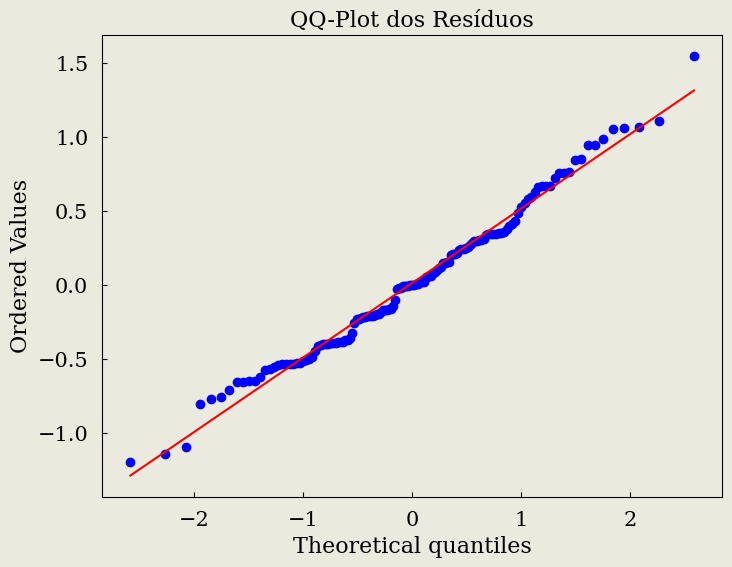

Teste de Durbin-Watson:
Estatística de teste: 2.2269943711758855
Teste de White (Breusch-Pagan) para Homocedasticidade:
Estatística de teste: 7.938008045284024
Valor-p: 0.01889224001127835
Teste t da variável x:
Estatística de teste: 25.171528348346243
Valor-p: 8.214627063860914e-140


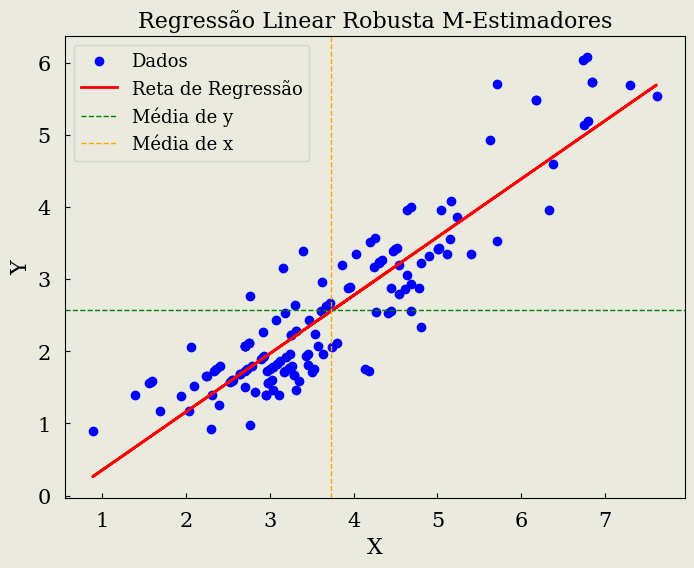

log(y) = -0.46 + 0.81log(x)


In [357]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import shapiro, probplot
from statsmodels.stats.diagnostic import het_white
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.robust.robust_linear_model import RLM
import statsmodels.api as sm

# Função para realizar a regressão linear simples e verificar os pressupostos
def regressao_linear_simples(x, y):
    # Adicionando uma coluna de constantes à matriz de variáveis explicativas
    x_constante = sm.add_constant(x)

    # Ajustando o modelo de regressão linear aos dados
    modelo_rlm = RLM(y, x_constante,M=sm.robust.norms.HuberT()).fit()

    # Coeficientes
    intercept = modelo_rlm.params[0]
    coeficiente = modelo_rlm.params[1]
    print(f"Coeficiente de interceptação: {intercept}")
    print(f"Coeficiente de inclinação: {coeficiente}")

    # Estatísticas do modelo
    print("Sumário do modelo:")
    print(modelo_rlm.summary())

    # Obtendo os resíduos do modelo
    residuos = modelo_rlm.resid

    # Teste de Shapiro-Wilk para normalidade dos resíduos
    stat, p_valor_shapiro = shapiro(residuos)
    print(f"Teste de Shapiro-Wilk:\nEstatística de teste: {stat}\nValor-p: {p_valor_shapiro}")

    # Gráfico QQ-Plot dos resíduos
    probplot(residuos, dist="norm", plot=plt)
    plt.title('QQ-Plot dos Resíduos')
    plt.show()

    # Teste de Durbin-Watson
    dw_statistic = sm.stats.stattools.durbin_watson(residuos)
    print("Teste de Durbin-Watson:")
    print("Estatística de teste:", dw_statistic)

    # Teste White para heterocedasticidade
    white_statistic, p_valor_white, _, _ = het_white(residuos, x_constante)
    print(f"Teste de White (Breusch-Pagan) para Homocedasticidade:\nEstatística de teste: {white_statistic}\nValor-p: {p_valor_white}")



    # Teste t da variável x
    t_statistic_x = modelo_rlm.tvalues[1]
    p_valor_t_x = modelo_rlm.pvalues[1]
    print(f"Teste t da variável x:\nEstatística de teste: {t_statistic_x}\nValor-p: {p_valor_t_x}")

    # Gráfico de dispersão dos dados com a reta de regressão
    plt.scatter(x, y, color='blue', label='Dados')
    plt.plot(x, modelo_rlm.predict(x_constante), color='red', linewidth=2, label='Reta de Regressão')
    plt.axhline(y=np.mean(y), color='green', linestyle='--', linewidth=1, label='Média de y')
    plt.axvline(x=np.mean(x), color='orange', linestyle='--', linewidth=1, label='Média de x')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regressão Linear Robusta M-Estimadores')
    plt.legend()
    plt.show()


    print(f'log(y) = {round((intercept),2)} + {round((coeficiente),2)}log(x)')
# Dados de exemplo
y = amostra['Preço']
x = amostra['Sales']

# Chamando a função de regressão linear simples
regressao_linear_simples(x, y)

In [359]:

def transformacao_escala_logistica(intercepto, coeficiente, x):
    """
    Realiza a transformação de escala logarítmica para a relação entre y e x.
    
    Parâmetros:
        - intercepto: O intercepto da equação de regressão.
        - coeficiente: O coeficiente associado ao logaritmo de x na equação de regressão.
        - x: O valor da variável independente x para o qual deseja-se prever y.
        
    Retorna:
        - O valor de y na escala original correspondente ao valor de x.
    """
    y_log = intercepto + coeficiente * np.log(x)
    y = np.exp(y_log)
    return y

# Exemplo de valores da regressão
intercepto = -0.46
coeficiente = 0.81

# Valor de x para o qual queremos prever y na escala original
x = 2

# Realizar a transformação de escala
y_original = transformacao_escala_logistica(intercepto, coeficiente, x)

print("Valor de y na escala original:", y_original)

Valor de y na escala original: 1.1067737108492302


In [360]:
def transformacao_escala_logistica(intercepto, coeficiente):
    """
    Retorna a função de transformação de escala logística.

    Parâmetros:
        - intercepto: O intercepto da equação de regressão.
        - coeficiente: O coeficiente associado ao logaritmo de x na equação de regressão.

    Retorna:
        - A função de transformação de escala logística.
    """

    e = np.e
    return f"y = {round(e,2)}^{intercepto:,.2F} * x^{coeficiente:,.2F}"

# Exemplo de valores da regressão
intercepto = -0.46
coeficiente = 0.81

# Obtendo a fórmula de transformação de escala logística
formula = transformacao_escala_logistica(intercepto, coeficiente)

print("Fórmula de transformação de escala logística:")
print(formula)

Fórmula de transformação de escala logística:
y = 2.72^-0.46 * x^0.81


### calculando funçaõ exp para x = 1

In [361]:
inte = 2.72**-0.46
coef = 1**0.81

y = inte * coef

print(f'{round(y,2)} para f(x) =1')

0.63 para f(x) =1


### Quantos % aumenta y de x? 

In [362]:
alpha = (inte*0.81/1)*100
alpha

51.119114591964845

### Isso significa que o aumento na receita está associado a um aumento percentual no preço do produto, que é cerca de 51% do preço atual do produto. Essa interpretação considera a relação entre a receita e o preço do produto modelada pela equação fornecida.